# Basics of plotting in python (matplotlib)

Further reading:

- M. Newman's textbook http://www-personal.umich.edu/~mejn/cp/chapters/graphics.pdf
- matplotlib documentation https://matplotlib.org/stable/index.html

In [1]:
# Preliminaries: import matplotlib and set default styles
import matplotlib.pyplot as plt

# Default style parameters (feel free to modify as you see fit)
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'xtick.direction':'in',
         'ytick.direction':'in',
         }
plt.rcParams.update(params)

# Line plots

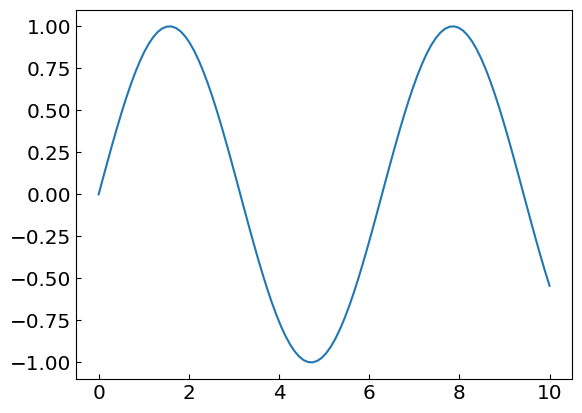

In [2]:
from numpy import linspace,sin,cos


# Take 100 equally spaced points between 0 and 10 and store them as a list
numpoints = 100
x = linspace(0,10,numpoints)

# Calculate the value of sin(x) and each point and store in a list y
y = sin(x)

# Make a plot and show the results
plt.plot(x,y)
plt.show()

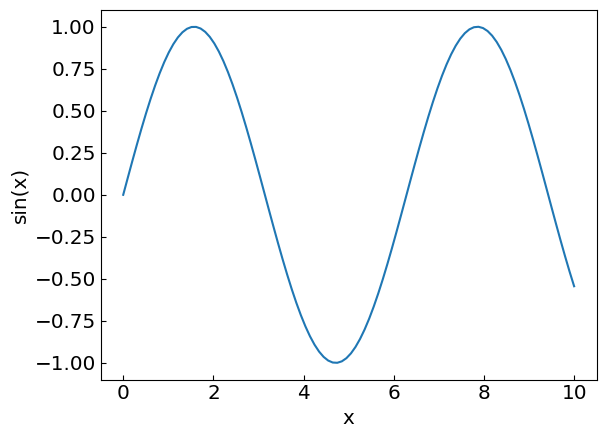

In [3]:
# Let us improve the presentation by adding the axis labels

plt.xlabel("x")
plt.ylabel("sin(x)")

plt.plot(x,y)
plt.show()

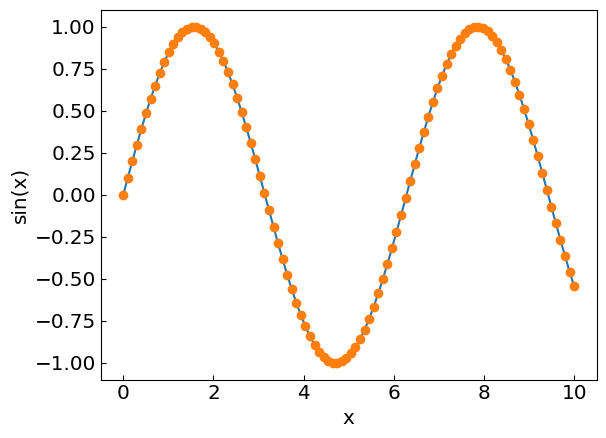

In [4]:
# By default the data points are connected by lines
# We can also plot the points themselves by using scatter style

plt.xlabel("x")
plt.ylabel("sin(x)")

# First the line plot
plt.plot(x,y)

# Then, the scatter plot
plt.plot(x,y,"o")
plt.show()

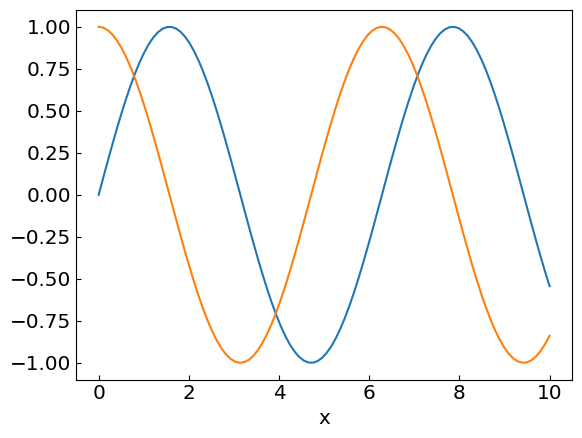

In [5]:
# Multiple plots
# Let us plot both sin(x) and cos(x)

numpoints = 100
x = linspace(0,10,numpoints)

# Calculate the value of sin(x) and each point and store in a list y
ysin = sin(x)
ycos = cos(x)

# Make a plot and show the results
plt.xlabel("x")
plt.plot(x,ysin)
plt.plot(x,ycos)
plt.show()

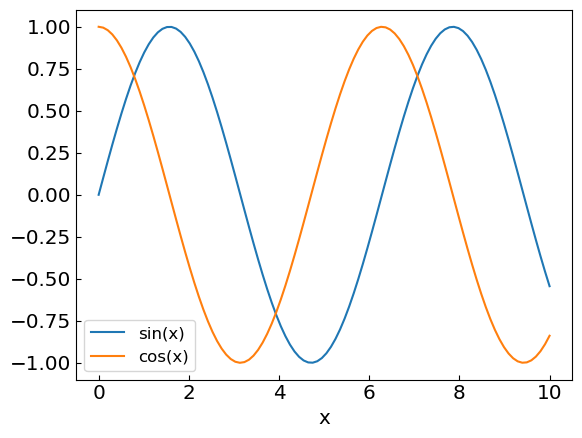

In [6]:
# Add a legend when there is more than one quantity plotted

plt.xlabel("x")
plt.plot(x, ysin, label = 'sin(x)')
plt.plot(x, ycos, label = 'cos(x)')
plt.legend()
plt.show()

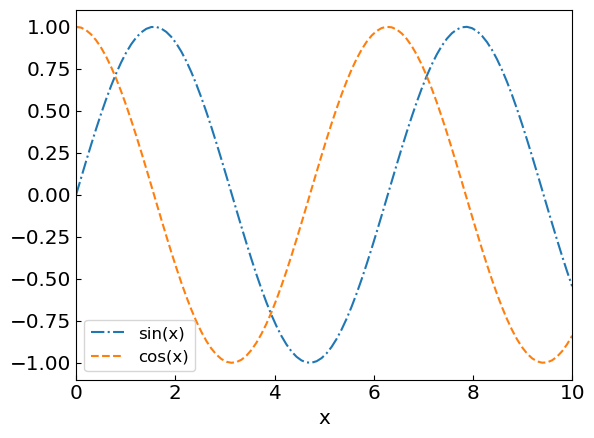

In [7]:
# Use different line styles

plt.xlabel("x")
plt.xlim(0,10)
plt.plot(x, ysin, label = 'sin(x)', linestyle = '-.')
plt.plot(x, ycos, label = 'cos(x)', linestyle = '--')
plt.legend()
plt.show()

# Scatter plots

In a scatter plot one places a dot for each (x,y) point in the data set

Useful for marking observations

For example the scatter plot the distribution of bright and surface temperature of stars (from Mark Newman's book http://www-personal.umich.edu/~mejn/cp/chapters/graphics.pdf)

[[ 6.83145085e+02  1.57300000e+01]
 [ 6.83145085e+02  1.70100000e+01]
 [ 1.01283217e+03  1.58600000e+01]
 ...
 [ 1.27621641e+04 -1.37000000e+00]
 [ 1.42023258e+04 -2.77000000e+00]
 [ 1.47860721e+04  1.04600000e+01]]
[  683.14508541   683.14508541  1012.83217289 ... 12762.1641452
 14202.3258475  14786.0720701 ]
[15.73 17.01 15.86 ... -1.37 -2.77 10.46]


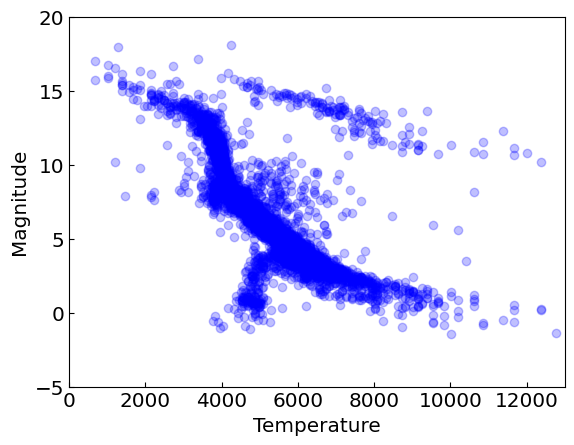

In [8]:
from numpy import loadtxt

# Load the start brightness-surface temperature pairs from file
data = loadtxt("stars.txt",float)

print(data)

x = data[:,0] # The first column from file

y = data[:,1] # The second column from file

print(x)
print(y)

plt.scatter(x,y, color = "blue", alpha = 0.25)

plt.xlabel("Temperature")
plt.ylabel("Magnitude")

plt.xlim(0,13000)
plt.ylim(-5,20)

plt.show()

Another example: Sample of uniformly distributed points inside a unit square (from matplotlib docs https://matplotlib.org/stable/gallery/shapes_and_collections/scatter.html#sphx-glr-gallery-shapes-and-collections-scatter-py)

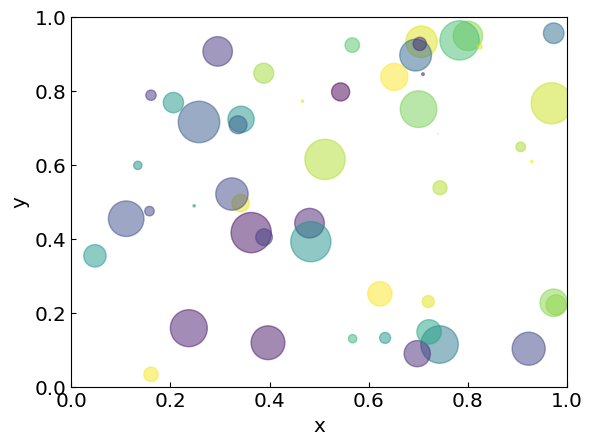

In [9]:
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)
# np.random.seed(3)

N = 50
x = np.random.rand(N)
y = np.random.rand(N)

# Random color
colors = np.random.rand(N)

# Random size
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

# Contour/density plots

Used to visualize two-dimensional data, e.g. two-dimensional functions $f(x,y)$

For example, the electric potential of a dipole reads (dimensionless units)

$V_{dip} (x,y) = \frac{1}{\sqrt{(x-x_1)^2+(y-y_1)^2}} - \frac{1}{\sqrt{(x-x_2)^2+(y-y_2)^2}}$

Here $(x_1,y_1)$ and $(x_2,y_2)$ are the coordinates of the poles

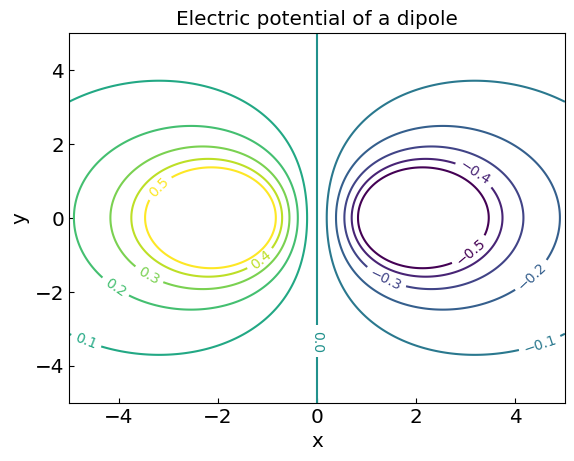

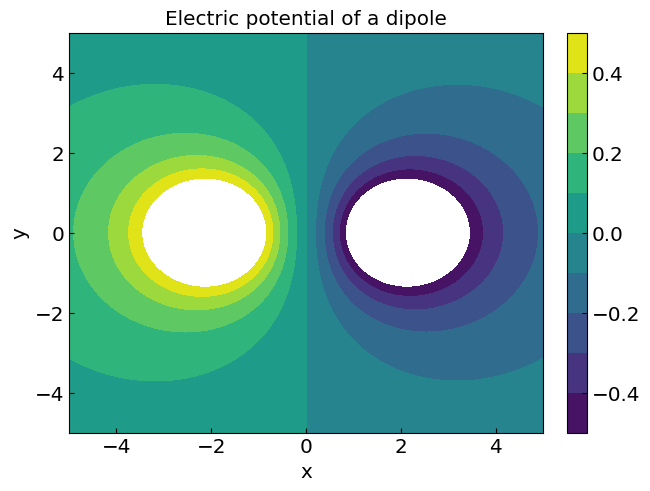

In [10]:
x = np.linspace(-5,5,200)
y = np.linspace(-5,5,200)

x1, y1 = -2., 0.
x2, y2 = 2., 0.

X, Y = np.meshgrid(x, y)

Vdip = 1./np.sqrt((X-x1)**2+(Y-y1)**2) - 1./np.sqrt((X-x2)**2+(Y-y2)**2)

#plt.contourf(X, Y, Vdip, 10)
plt.title("Electric potential of a dipole")
plt.xlabel("x")
plt.ylabel("y")

CS = plt.contour(X, Y, Vdip, levels = np.linspace(-0.5,0.5,11))
#plt.contourf(CS)
plt.clabel(CS)
plt.show()

# Fill the levels
fig2, ax2 = plt.subplots(constrained_layout=True)
ax2.set_title("Electric potential of a dipole")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
CS2 = ax2.contourf(CS, levels = np.linspace(-0.5,0.5,11))
fig2.colorbar(CS2)
plt.show()

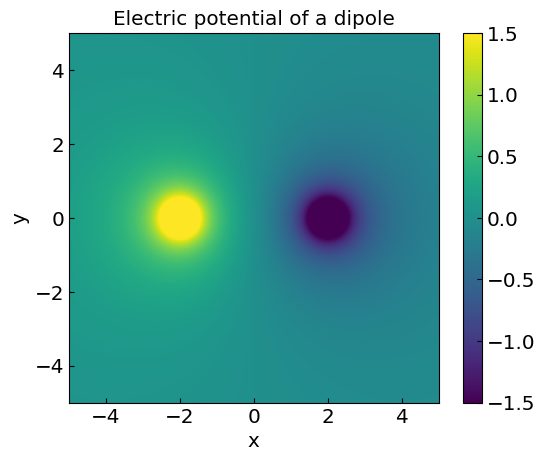

In [11]:
# Another example using imshow (good for interpolating colors)

plt.title("Electric potential of a dipole")
plt.xlabel("x")
plt.ylabel("y")
CS3 = plt.imshow(Vdip, vmax=1.5, vmin=-1.5,origin="lower",extent=[-5,5,-5,5])
plt.colorbar(CS3)
plt.show()

# Animation

Let us animate the motion of a projectile thrown at an angle $\theta$ with initial velocity $v_0$

We have for the velocity
$
v_x(t) = v_0 \cos(\theta)
$ and
$
v_y(t) = v_0 \sin(\theta) - gt
$.

For the position coordinates
$$
x(t) = v_0 \cos(\theta) t
$$
and
$$
y(t) = v_0 \sin(\theta) t - \frac{g t^2}{2}
$$

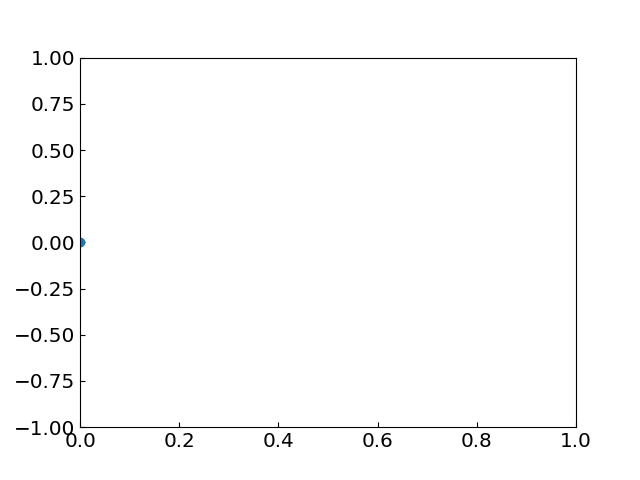

In [14]:
# Enable interactive plot
%matplotlib ipympl

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

pos, = ax.plot(0,0,'o')
ax.set_xlim(0,1)
ax.set_ylim(-1,1)

v0 = 3.
theta = 60./180. * np.pi
g = 9.8

def pos_x(t):
    return v0 * cos(theta) * t

def pos_y(t):
    return v0 * sin(theta) * t - g*t**2/2.

dt = 0.01

l1x = [0]
l1y = [0]
line, = ax.plot(l1x,l1y)

total_frames = 70

def animate(frame):
    tx,ty = pos_x(frame*dt),pos_y(frame*dt)
    #ax.plot(tx,ty,'o')
    pos.set_data(tx,ty)
    if (len(l1x) < total_frames):
        l1x.append(tx)
    if (len(l1y) < total_frames):
        l1y.append(ty)
    line.set_data(l1x,l1y)
    # return pos,
    
ani = animation.FuncAnimation(
   fig=fig, func=animate, frames = total_frames, interval=30)
plt.show()
    
